In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Desktop/linear_regression_train.csv')
data

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Target
0,1,-10.429837,21.684251,93.056324,128.914740,1.657315,-34.602633,-70.314374,-89.585318,-98.465642,...,-99.322780,19.560135,25.568291,-40.876179,-116.146068,-82.181299,-99.423518,-41.150654,113.117197,5235.690928
1,2,12.475081,11.652011,-47.621889,-21.892583,-25.844861,-46.951253,-114.500805,-96.257473,-138.354981,...,-89.763107,-8.250307,-8.798353,-23.452091,-56.769063,-26.722372,-97.694304,13.816113,8.711894,-1221.442146
2,3,7.696188,24.729547,43.782383,-53.282523,-69.145794,-57.072335,-114.149171,-105.408739,-71.892560,...,-3.859655,-17.301240,-1.622924,-39.351214,-73.973949,-33.844638,-100.874861,-38.895598,34.488334,-1102.758862
3,4,6.505033,22.092605,-25.161422,4.742729,-20.344550,-50.248793,-89.324731,-104.002016,-160.103875,...,48.557507,-1.997502,-0.856194,-34.259923,-3.113819,13.398035,-94.899866,-77.051331,-16.014027,437.940266
4,5,5.906445,19.909180,24.705865,-51.875251,-24.857500,-25.879977,-37.787560,-99.587673,-47.929647,...,3.556973,-26.643253,-0.976567,-44.127974,-44.249542,-6.166813,-97.099111,-5.426910,-42.191157,755.825367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,47996,3.562959,11.486509,61.145800,2.805889,-28.902789,-30.775352,-66.414021,-103.186976,-130.046256,...,-105.482960,48.452228,-0.643498,-1.883623,-80.008729,-27.849186,-92.497409,-69.854208,47.798525,3353.082152
47996,47997,-2.748224,22.360721,124.499793,-21.230197,-60.030819,-27.661729,-60.773068,-102.180412,-140.769031,...,-101.472074,-36.467914,7.985939,-30.925713,-134.529393,5.100088,-87.846292,-21.788868,9.368803,2149.681236
47997,47998,13.876292,26.976793,86.952262,-70.016487,-10.544583,-71.143920,-138.125870,-97.217351,-92.475987,...,-134.999520,4.757532,16.897211,-20.287205,-100.728629,-48.036962,-102.180933,-63.056645,109.054688,-1703.219366
47998,47999,-4.422768,19.522277,61.596420,-23.721260,-24.057237,-28.699059,-14.257085,-112.711818,-56.741174,...,-32.319919,-45.396834,-9.835818,-28.323818,-63.691619,-19.455079,-85.611697,2.956711,4.267729,4551.706842


In [4]:
data_np = np.array(data)
col_size = data_np.shape[1]
X = data_np[:,1:col_size - 1].T
Y = data_np[:,col_size - 1].T

print("X :",X,"\nY :",Y)
n,m = X.shape               #m = number of training examples, n = number of features

X : [[ -10.42983652   12.47508125    7.69618811 ...   13.87629202
    -4.4227684     3.86605987]
 [  21.68425064   11.65201123   24.72954661 ...   26.97679336
    19.5222766    15.22206782]
 [  93.05632423  -47.62188868   43.78238349 ...   86.95226218
    61.59642015  -54.96995473]
 ...
 [ -99.42351759  -97.69430387 -100.87486091 ... -102.18093317
   -85.61169692  -97.34426689]
 [ -41.15065424   13.81611278  -38.8955983  ...  -63.05664522
     2.95671083 -136.72256202]
 [ 113.11719747    8.71189399   34.4883343  ...  109.05468792
     4.26772866   37.2040866 ]] 
Y : [ 5235.69092808 -1221.44214589 -1102.75886179 ... -1703.21936555
  4551.70684165 -2800.86325604]


In [5]:
def cost_function(X, Y, w, b):
    Y_pred = np.dot(w,X) + b
    error = np.sum((Y_pred  - Y)**2)
    cost = error/(2*m)            
    return cost

In [6]:
def gradient_function(X, Y, w, b): 
    Y_pred = np.dot(w,X) + b
    dj_dw = np.dot(X,Y_pred - Y) / m
    dj_db = np.sum(Y_pred - Y) / m
    
    return dj_db, dj_dw


In [7]:
def gradient_descent(X, Y, w_in, b_in, learning_rate, iterations): 
    
    w = w_in  
    b = b_in
    
    for i in range(iterations):
        
        dj_db,dj_dw = gradient_function(X, Y, w, b)  
        w = w - learning_rate * dj_dw               
        b = b - learning_rate * dj_db  
        
        if i % 100 == 0:
            cost = cost_function(X, Y, w, b)
            print(f"Iteration {i}: Cost {cost}")

    return w, b

In [8]:
initial_w = np.zeros(n)
initial_b = 0.
iterations = 5000
learning_rate = 0.00001

w_final, b_final = gradient_descent(X, Y, initial_w, initial_b, learning_rate, iterations)
Y_pred = []
print(f"b,w found by gradient descent: {b_final},{w_final} ")

for i in range(m):
    prediction = np.dot(w_final,X[:,i]) + b_final
    print(f"prediction: {prediction}, target value: {Y[i]}")
    Y_pred.append(prediction)

Iteration 0: Cost 2420160.2554051927
Iteration 100: Cost 933902.5063894695
Iteration 200: Cost 566836.5156756957
Iteration 300: Cost 384397.0331005558
Iteration 400: Cost 278031.00336211396
Iteration 500: Cost 212929.99618819758
Iteration 600: Cost 172137.137666336
Iteration 700: Cost 146181.30892562732
Iteration 800: Cost 129466.39564681683
Iteration 900: Cost 118587.33074855963
Iteration 1000: Cost 111434.26570810567
Iteration 1100: Cost 106682.97838082649
Iteration 1200: Cost 103493.81778945889
Iteration 1300: Cost 101329.65967480934
Iteration 1400: Cost 99844.08843367003
Iteration 1500: Cost 98811.9156539133
Iteration 1600: Cost 98085.60272775401
Iteration 1700: Cost 97567.71057798389
Iteration 1800: Cost 97193.35529441235
Iteration 1900: Cost 96918.95918727302
Iteration 2000: Cost 96714.99047843905
Iteration 2100: Cost 96561.24661239475
Iteration 2200: Cost 96443.76982131068
Iteration 2300: Cost 96352.81652437188
Iteration 2400: Cost 96281.51125708652
Iteration 2500: Cost 96224.94

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Text(0.5, 1.0, 'Linear Regression: Comparison of Actual Values to the Predicted Values')

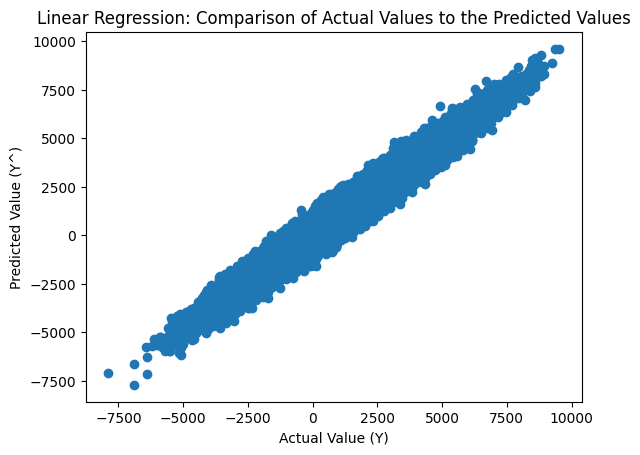

In [9]:
plt.scatter(Y,Y_pred)
plt.xlabel("Actual Value (Y)")
plt.ylabel("Predicted Value (Y^)")
plt.title("Linear Regression: Comparison of Actual Values to the Predicted Values")


In [21]:
#TEST

test = pd.read_csv('Desktop/linear_regression_test.csv')
test

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,1,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,...,-46.275616,-36.211021,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967
1,2,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,...,-53.961100,-27.153987,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539
2,3,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,...,-31.822475,-89.093319,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184
3,4,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,...,-6.004513,-59.862724,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127
4,5,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,...,-38.963648,-42.747877,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2.516790,13.198787,45.411326,-25.343444,-33.343441,-40.083697,-110.249581,-102.404209,-126.102213,...,-59.580992,-66.406066,-0.855422,-18.401377,-17.193749,-107.855552,6.542541,-97.337171,-59.221753,8.133988
11996,11997,6.971171,13.222694,88.455841,44.794110,-24.514454,-85.863918,-82.079235,-90.597125,-102.581859,...,-5.862443,-5.911085,1.830188,-4.416752,-47.964535,-112.116174,-41.919028,-98.893351,-37.260179,4.170628
11997,11998,-5.852616,12.037219,44.810335,9.092964,-28.861756,-24.442797,-102.642309,-88.214928,-52.269598,...,-2.694783,-28.743572,-35.723921,7.343820,-18.417126,-96.405529,-29.875688,-109.654456,18.413359,-6.979554
11998,11999,20.431793,3.025714,104.605949,-43.093887,-42.184472,-58.059142,-127.818023,-93.167693,-136.659290,...,-22.306799,-64.900975,-46.297870,10.503240,-40.309868,-125.745717,-18.091256,-99.048171,-58.060220,8.325778


In [41]:

test = np.array(test)
X_test = test[:,1:col_size - 1]
m_test = X_test.shape[0]


In [43]:
Y_pred_test = []
for i in range(m_test):
    prediction = np.dot(X_test[i,:],w_final) + b_final
    print(f"prediction: {prediction}")
    Y_pred_test.append(prediction)
Y_pred_test = np.array(Y_pred_test)
Y_pred_test.shape

prediction: 969.3624619333077
prediction: 4568.855947504652
prediction: 4253.573803545868
prediction: -1598.9137908572955
prediction: 969.2599385799778
prediction: -80.5514868135536
prediction: 3247.4659233132893
prediction: 4972.769755219627
prediction: 937.239013321592
prediction: -701.4683909959228
prediction: 3985.466961567462
prediction: 2143.5872194825474
prediction: 3267.927212110877
prediction: 3257.009396545608
prediction: -3092.984866385711
prediction: 1658.1950786845596
prediction: 3099.014760960547
prediction: -1291.3020260700055
prediction: -3946.969337025736
prediction: -183.4992796749048
prediction: 798.8741166394061
prediction: -236.12330772700312
prediction: 2448.232317847949
prediction: 4579.4807233945
prediction: 5507.691268255311
prediction: 1388.2852073327383
prediction: 4413.764023052627
prediction: 1638.2797117488612
prediction: -294.737107399952
prediction: -3370.1645356181243
prediction: 38.20571909956602
prediction: 1268.4171694244606
prediction: 2271.82335846

(12000,)

In [48]:
Y_pred_test = Y_pred_test.reshape(12000,1)
test = np.concatenate((test,Y_pred_test), axis = 1)

In [49]:
pd = pd.DataFrame(test)
pd.to_csv('Linear_Regression_Test_Output.csv')

In [50]:
pd

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,-13.296650,26.947913,95.977811,-25.167831,-25.863389,-46.432548,-30.120148,-99.220569,-95.771730,...,46.588536,-1.146567,-55.504215,-70.993172,-13.516826,-93.085585,-10.310519,-47.579967,969.362462,969.362462
1,2.0,13.740478,26.632355,-1.056834,113.386950,-26.957189,-40.305571,-8.916968,-99.182781,-65.653323,...,-20.942724,-5.648802,-27.809076,-151.023959,-37.020808,-99.351817,7.806000,75.691539,4568.855948,4568.855948
2,3.0,5.757701,5.729282,-7.846318,9.063737,-54.522411,-17.102457,-89.391519,-81.827183,-104.007163,...,-9.672241,15.562814,-13.848764,-79.762693,-59.360365,-104.771868,-29.851237,71.920184,4253.573804,4253.573804
3,4.0,-0.365463,26.040174,15.941714,-47.019942,-32.029202,-34.080470,-105.277503,-104.742190,-135.598491,...,16.676153,-14.092968,-30.554072,-86.409042,26.117858,-97.644419,-57.080490,3.592127,-1598.913791,-1598.913791
4,5.0,-7.076549,13.958214,52.805040,-41.259861,-22.072337,-42.073960,-42.290671,-91.763629,-18.252699,...,-10.722687,18.179473,-39.178435,-149.742179,-36.540063,-105.068864,-63.126882,41.053917,969.259939,969.259939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996.0,2.516790,13.198787,45.411326,-25.343444,-33.343441,-40.083697,-110.249581,-102.404209,-126.102213,...,-0.855422,-18.401377,-17.193749,-107.855552,6.542541,-97.337171,-59.221753,8.133988,-301.401223,-301.401223
11996,11997.0,6.971171,13.222694,88.455841,44.794110,-24.514454,-85.863918,-82.079235,-90.597125,-102.581859,...,1.830188,-4.416752,-47.964535,-112.116174,-41.919028,-98.893351,-37.260179,4.170628,-819.306827,-819.306827
11997,11998.0,-5.852616,12.037219,44.810335,9.092964,-28.861756,-24.442797,-102.642309,-88.214928,-52.269598,...,-35.723921,7.343820,-18.417126,-96.405529,-29.875688,-109.654456,18.413359,-6.979554,5360.226823,5360.226823
11998,11999.0,20.431793,3.025714,104.605949,-43.093887,-42.184472,-58.059142,-127.818023,-93.167693,-136.659290,...,-46.297870,10.503240,-40.309868,-125.745717,-18.091256,-99.048171,-58.060220,8.325778,-98.862066,-98.862066
